In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
data = [2354.63,2517.62,2752.02,2517.28,2532.06, 3211.4, 4309.27, 5051.82, 5241.32, 5563.05, 6357.81, 7798.9, 7902.48, 8383.1,9062.1, 9771.84, 10249.07]

In [3]:
def holt(y, alpha, gamma):
  # Inisialisasi tren dan nilai pemulusan
  b_t1 = y[1] - y[0]
  s_t1 = y[0]

  # Level and trend estimates lists
  bt = [b_t1]
  st = [s_t1]

  # Recursive estimation of level and trend
  for i in range(1, len(y)):
    s_t = alpha*y[i] + (1-alpha)*(st[i-1] + bt[i-1])
    b_t = gamma*(s_t - st[i-1]) + (1-gamma)*bt[i-1]
    bt.append(b_t)
    st.append(s_t)


  # Forecast list
  F = [np.nan]

  # Recursive calculation of forecasts
  for i in range(len(y)-1):
    f_t = st[i] + bt[i]
    F.append(f_t)

  # Membuat tabel perhitungan
  dict1 = {'Periode' : [i for i in range(1,len(data)+1)],
            'Data' : y,
            'St':st,
            'Bt':bt,
            'Ft':F}

  df = pd.DataFrame(dict1)

  return F, df

In [4]:
holt(data,0.9,0.19)

([nan,
  2517.62,
  2680.6099999999997,
  2920.08011,
  2663.88230219,
  2629.0229077345098,
  3336.5294510663603,
  4561.701739267197,
  5436.324190672591,
  5660.990719208116,
  5956.266509077081,
  6769.7420250117975,
  8324.056590328251,
  8500.620449913766,
  8930.738838937064,
  9607.313436381155,
  10341.870938504388],
     Periode      Data            St          Bt            Ft
 0         1   2354.63   2354.630000  162.990000           NaN
 1         2   2517.62   2517.620000  162.990000   2517.620000
 2         3   2752.02   2744.879000  175.201110   2680.610000
 3         4   2517.28   2557.560011  106.322291   2920.080110
 4         5   2532.06   2545.242230   83.780678   2663.882302
 5         6   3211.40   3153.162291  183.367160   2629.022908
 6         7   4309.27   4211.995945  349.705794   3336.529451
 7         8   5051.82   5002.808174  433.516017   4561.701739
 8         9   5241.32   5260.820419  400.170300   5436.324191
 9        10   5563.05   5572.844072  383.

In [5]:
def mape(actual, forecast):
  """
    Calculate the Mean Absolute Percentage Error (MAPE) between actual and forecasted values.

    Parameters:
    actual (array-like): Array of actual values.
    forecast (array-like): Array of forecasted values.

    Returns:
    float: MAPE value.
  """
  actual = actual[1:]
  forecast = forecast[1:]

  actual, forecast = np.array(actual), np.array(forecast)
  mape = np.mean(np.abs((actual - forecast) / actual)) * 100
  return mape


In [6]:
def func_mape(y, alpha, gamma):
  # membuat fungsi f(x) yang akan digunakan pada perhitungan iterasi golden section
  predict, tabel = holt(y, alpha, gamma)
  return mape(y, predict)

In [7]:
def mape_test(actual, forecast):
  actual = actual[11:]
  forecast = forecast[11:]
  actual, forecast = np.array(actual), np.array(forecast)
  mape = np.mean(np.abs((actual - forecast) / actual)) * 100
  return mape


In [8]:
def func_mape_test(y, alpha, gamma):
  predict, tabel = holt(y, alpha, gamma)
  return mape_test(y, predict)

In [9]:
def golden_section(data1, f, a1, b1, a2, b2, epsilon, max_iter):
      k = 0
      tau = (np.sqrt(5) - 1)/2 # golden ratio
      x1= a1+(1-tau)*( b1- a1)
      x2= a1+(tau)*( b1- a1)
      y1= a2+(1-tau)*( b2- a2)
      y2= a2+(tau)*( b2- a2)
      fA = f(data1,x1,y1)
      fB = f(data1,x1,y2)
      fC = f(data1,x2,y1)
      fD = f(data1,x2,y2)
      while np.sqrt((b1-a1)**2 + (b2-a2)**2) > epsilon:
        k = k + 1
        min_point = min(fA, fB, fC, fD)
        if fA == min_point:
          b1=x2
          b2=y2
        elif min_point == fB:
          b1=x2
          a2=y1
        elif min_point == fC:
          a1=x1
          a2=y1
        elif min_point == fD:
          a1=x1
          b2=y2

        x1= a1+(1-tau)*( b1- a1)
        x2= a1+(tau)*( b1- a1)
        y1= a2+(1-tau)*( b2- a2)
        y2= a2+(tau)*( b2- a2)

        fA = f(data1,x1,y1)
        fB = f(data1,x1,y2)
        fC = f(data1,x2,y1)
        fD = f(data1,x2,y2)

      minimum = min(fA, fB, fC, fD)
      if minimum == fA:
        return k,x1,y1
      elif minimum == fB:
        return k,x1,y2
      elif minimum == fC:
        return k,x2,y1
      elif minimum == fD:
        return k,x2,y2


In [10]:
(golden_section(data1=data,f=func_mape,a1=0.5, b1=1, a2=0,b2=0.5, epsilon = 0.000001, max_iter=2000))

(28, 0.9999997312547501, 0.3819664460890538)

In [11]:
def golden_section_table(data1, f, a1, b1, a2, b2, epsilon):
  k = 1
  tau = (np.sqrt(5) - 1)/2 # golden ratio
  x1= a1+(1-tau)*( b1- a1)
  x2= a1+(tau)*( b1- a1)
  y1= a2+(1-tau)*( b2- a2)
  y2= a2+(tau)*( b2- a2)

  fA = f(data1,x1,y1)
  fB = f(data1,x1,y2)
  fC = f(data1,x2,y1)
  fD = f(data1,x2,y2)

  # menyiapkan tabel 1
  list_k = [k]
  list_a1 = [a1]
  list_b1 = [b1]
  list_x1 = [x1]
  list_x2 = [x2]
  list_a2 = [a2]
  list_b2 = [b2]
  list_y1 = [y1]
  list_y2 = [y2]
  list_fa = [fA]
  list_fb = [fB]
  list_fc = [fC]
  list_fd = [fD]
  list_toleransi = [np.sqrt((b1-a1)**2 + (b2-a2)**2)]

  # melakukan iterasi golden section search
  while np.sqrt((b1-a1)**2 + (b2-a2)**2) > epsilon:
    k = k + 1
    min_point = min(fA, fB, fC, fD)
    if fA == min_point:
      b1=x2
      b2=y2
    elif min_point == fB:
      b1=x2
      a2=y1
    elif min_point == fC:
      a1=x1
      a2=y1
    elif min_point == fD:
      a1=x1
      b2=y2
    x1= a1+(1-tau)*( b1- a1)
    x2= a1+(tau)*( b1- a1)
    y1= a2+(1-tau)*( b2- a2)
    y2= a2+(tau)*( b2- a2)
    fA = f(data1,x1,y1)
    fB = f(data1,x1,y2)
    fC = f(data1,x2,y1)
    fD = f(data1,x2,y2)
    #
    list_k.append(k)
    list_a1.append(a1)
    list_b1.append(b1)
    list_x1.append(x1)
    list_x2.append(x2)
    list_a2.append(a2)
    list_b2.append(b2)
    list_y1.append(y1)
    list_y2.append(y2)
    list_fa.append(fA)
    list_fb.append(fB)
    list_fc.append(fC)
    list_fd.append(fD)
    list_toleransi.append(np.sqrt((b1-a1)**2 + (b2-a2)**2))
    #

  tabel = {'iterasi':list_k,
           'a1':list_a1,
           'b1':list_b1,
           'x1':list_x1,
           'x2':list_x2,
           'a2':list_a2,
           'b2':list_b2,
           'y1':list_y1,
           'y2':list_y2,
           'f(x1,y1)':list_fa,
           'f(x1,y2)':list_fb,
           'f(x2,y1)':list_fc,
           'f(x2,y2)':list_fd,
           'nilai_toleransi':list_toleransi}

  tabel = pd.DataFrame(tabel)
      #tabel.set_index('k', inplace=True)

  # menyiapkan tabel 2
  nilai_alpha = []
  nilai_gamma = []
  nilai_mape = []

  for i in range(len(tabel)):
    min1 = min(tabel['f(x1,y1)'][i],
               tabel['f(x1,y2)'][i],
               tabel['f(x2,y1)'][i],
               tabel['f(x2,y2)'][i])
    if tabel['f(x1,y1)'][i] == min1:
      nilai_alpha.append(tabel['x1'][i])
      nilai_gamma.append(tabel['y1'][i])
      nilai_mape.append(func_mape(data1,nilai_alpha[i],nilai_gamma[i]))
    elif tabel['f(x1,y2)'][i] == min1:
      nilai_alpha.append(tabel['x1'][i])
      nilai_gamma.append(tabel['y2'][i])
      nilai_mape.append(func_mape(data1,nilai_alpha[i],nilai_gamma[i]))
    elif tabel['f(x2,y1)'][i] == min1:
      nilai_alpha.append(tabel['x2'][i])
      nilai_gamma.append(tabel['y1'][i])
      nilai_mape.append(func_mape(data1,nilai_alpha[i],nilai_gamma[i]))
    elif tabel['f(x2,y2)'][i] == min1:
      nilai_alpha.append(tabel['x2'][i])
      nilai_gamma.append(tabel['y2'][i])
      nilai_mape.append(func_mape(data1,nilai_alpha[i],nilai_gamma[i]))

  tabel2 = {'iterasi':list_k,
            'alpha':nilai_alpha,
            'gamma':nilai_gamma,
            'MAPE':nilai_mape}
  tabel2 = pd.DataFrame(tabel2)

  minimum = min(fA, fB, fC, fD)
  if minimum == fA:
    return k,x1,y1,tabel,tabel2
  elif minimum == fB:
    return k,x1,y2,tabel,tabel2
  elif minimum == fC:
    return k,x2,y1,tabel,tabel2
  elif minimum == fD:
    return k,x2,y2,tabel,tabel2


In [12]:
iter,a,g,tab1,tab2 = (golden_section_table(data1=data,f=func_mape,a1=0.5, b1=1, a2=0,b2=0.5, epsilon = 0.0001))

In [26]:
print(iter,a,g)

20 0.9999795718254958 0.38199906473078105


In [27]:
tab2

,iterasi,alpha,gamma,MAPE
0,1,0.809017,0.190983,6.986558
1,2,0.881966,0.309017,7.085521
2,3,0.927051,0.381966,7.003498
3,4,0.954915,0.454915,6.871675
4,5,0.972136,0.427051,6.796586
5,6,0.982779,0.409830,6.751128
6,7,0.989357,0.399187,6.723386
7,8,0.993422,0.392609,6.706372
8,9,0.995935,0.388544,6.695906
9,10,0.997488,0.386031,6.689457


In [15]:
func_mape(data,1,0.2243823)

6.6634585724049895

In [25]:
tab1.to_excel('output.xlsx')

In [28]:
tab1

,iterasi,a1,b1,x1,x2,a2,b2,y1,y2,"f(x1,y1)","f(x1,y2)","f(x2,y1)","f(x2,y2)",nilai_toleransi
0,1,0.500000,1,0.690983,0.809017,0.000000,0.500000,0.190983,0.309017,7.026066,7.276962,6.986558,7.221851,0.707107
1,2,0.690983,1,0.809017,0.881966,0.190983,0.500000,0.309017,0.381966,7.221851,7.343705,7.085521,7.162553,0.437016
2,3,0.809017,1,0.881966,0.927051,0.309017,0.500000,0.381966,0.427051,7.162553,7.195281,7.003498,7.013009,0.270091
3,4,0.881966,1,0.927051,0.954915,0.381966,0.500000,0.427051,0.454915,7.013009,7.011694,6.882999,6.871675,0.166925
4,5,0.927051,1,0.954915,0.972136,0.381966,0.454915,0.409830,0.427051,6.886995,6.882999,6.804352,6.796586,0.103165
5,6,0.954915,1,0.972136,0.982779,0.381966,0.427051,0.399187,0.409830,6.807979,6.804352,6.756181,6.751128,0.063760
6,7,0.972136,1,0.982779,0.989357,0.381966,0.409830,0.392609,0.399187,6.758850,6.756181,6.726596,6.723386,0.039406
7,8,0.982779,1,0.989357,0.993422,0.381966,0.399187,0.388544,0.392609,6.728406,6.726596,6.708387,6.706372,0.024354
8,9,0.989357,1,0.993422,0.995935,0.381966,0.392609,0.386031,0.388544,6.709566,6.708387,6.697163,6.695906,0.015052
9,10,0.993422,1,0.995935,0.997488,0.381966,0.388544,0.384479,0.386031,6.697914,6.697163,6.690238,6.689457,0.009302


<ipython-input-23-b018238da76a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 40)
<ipython-input-23-b018238da76a>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), rotation = -25)
<ipython-input-23-b018238da76a>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels(ax.get_zticks(), rotation = 40)


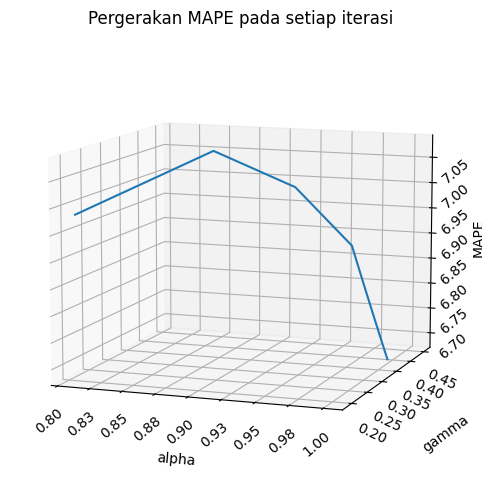

In [23]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(tab2['alpha'].to_list(), tab2['gamma'].to_list(),zs=tab2['MAPE'].to_list())

ax.zaxis.set_rotate_label(False)
ax.set_xlabel('\nalpha', linespacing=3.2)
ax.set_ylabel('\ngamma',linespacing=4.5)
ax.set_zlabel('\nMAPE',rotation=90,linespacing=-1.0)

ax.set_xticklabels(ax.get_xticks(), rotation = 40)
ax.set_yticklabels(ax.get_yticks(), rotation = -25)
ax.set_zticklabels(ax.get_zticks(), rotation = 40)

ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax.view_init(10, -70, 0)

ax.set_title('Pergerakan MAPE pada setiap iterasi')
plt.show()

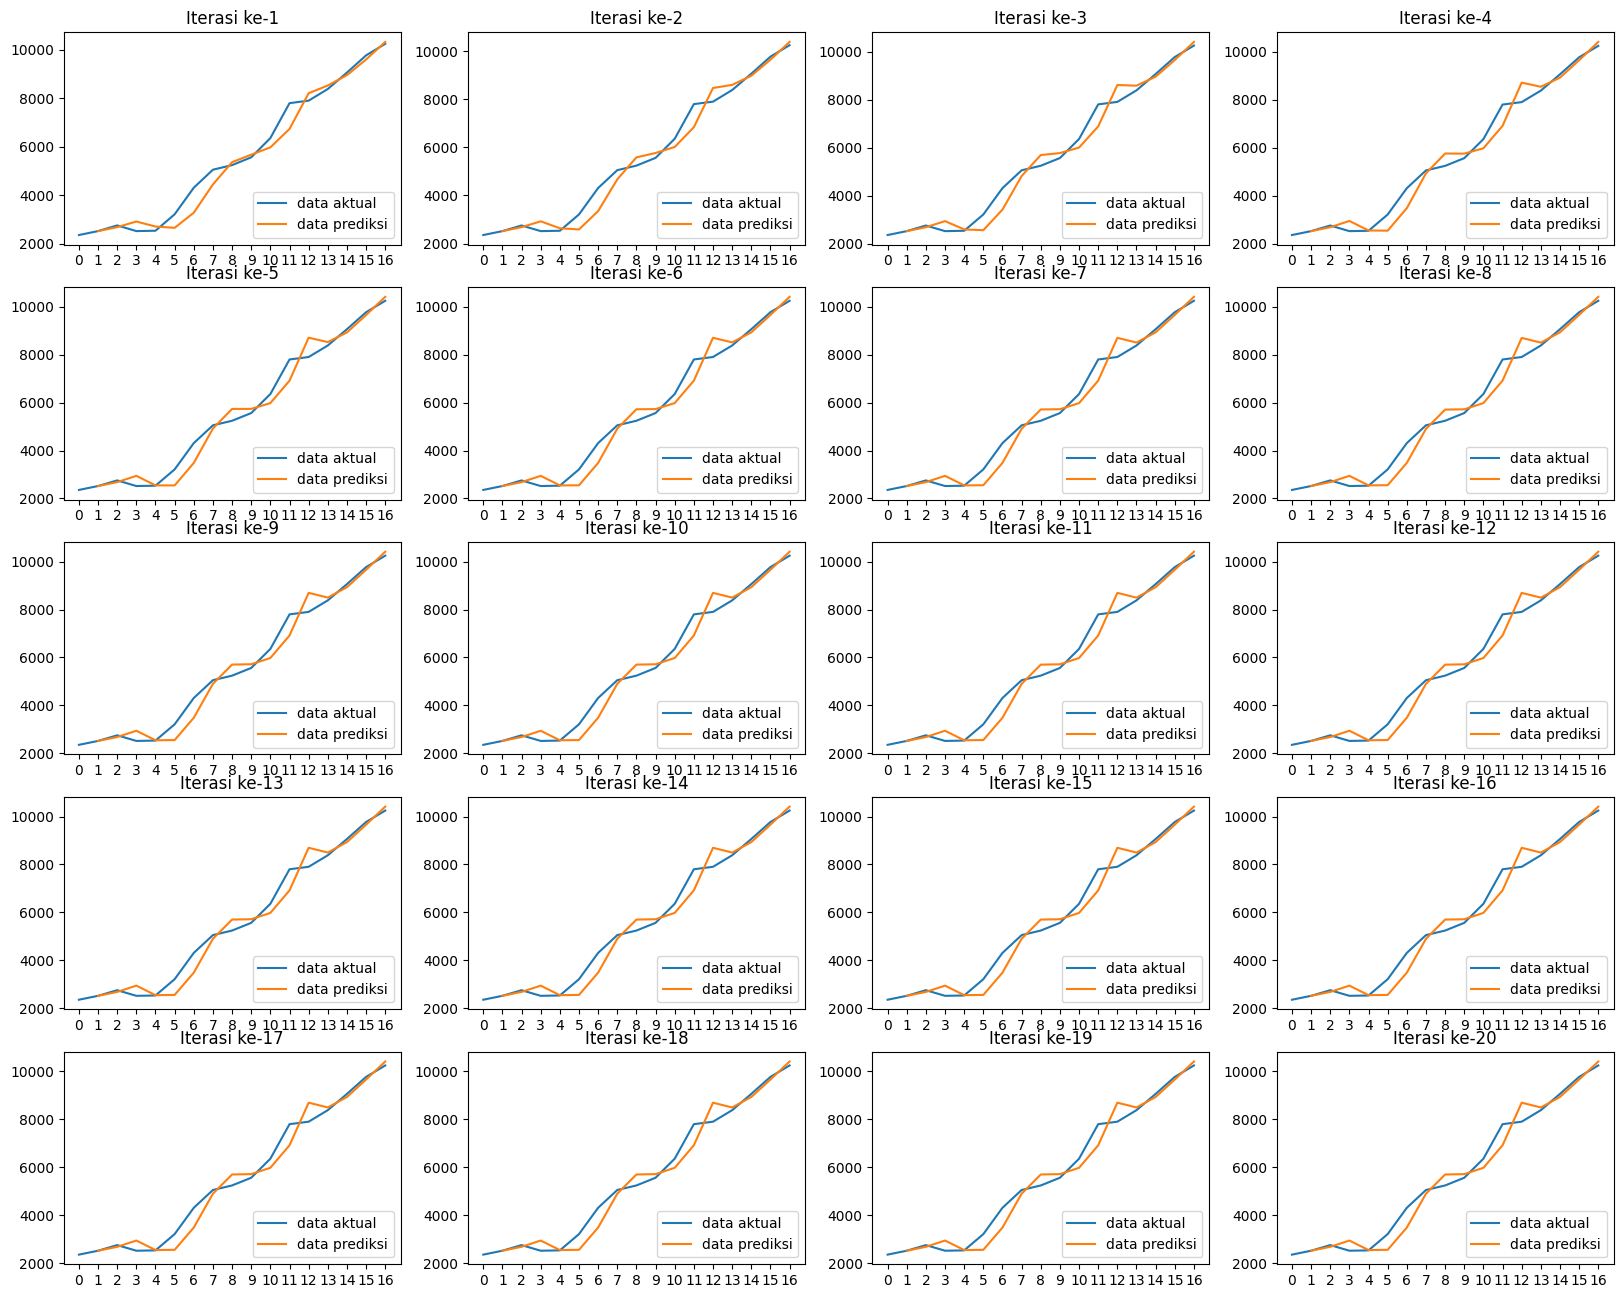

In [18]:
x_axis = [i for i in range(17)]
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,16))
for i,ax in enumerate(axes.flatten()):
  ax.plot(data, label='data aktual')
  ax.plot(holt(y=data, alpha=tab2['alpha'][i], gamma=tab2['gamma'][i])[0], label='data prediksi')
  ax.set_xticks(np.arange(min(x_axis), max(x_axis)+1, 1.0))
  ax.legend(["data aktual", "data prediksi"], loc ="lower right")
  ax.set_title('Iterasi ke-{}'.format(i+1))

In [19]:
#mape_testing = []
#for i in range(len(tab2)):
  #mape_testing.append(func_mape_test(data, tab2['alpha'][i], tab2['gamma'][i]))

In [20]:
#tab2['MAPE_test'] = mape_testing
#tab2

In [21]:
#func_mape_test(data,0.5,0.4)